<a href="https://colab.research.google.com/github/VivianeMatosOliveira/Curso_Analista_Dados/blob/main/Exercicios/modulo_24_exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
penguim = sns.load_dataset('penguins')

In [ ]:
#renomeando colunas
penguim = penguim.rename(columns={"species": "especies", "island": "ilha",'bill_length_mm':'comprimento_bico_mm', 'bill_depth_mm':'profundidade_bico_mm','flipper_length_mm':'comprimento_nadadeira_mm','body_mass_g':'massa_corporal_g','sex':'sexo'})

In [ ]:
penguim.head()

,especies,ilha,comprimento_bico_mm,profundidade_bico_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

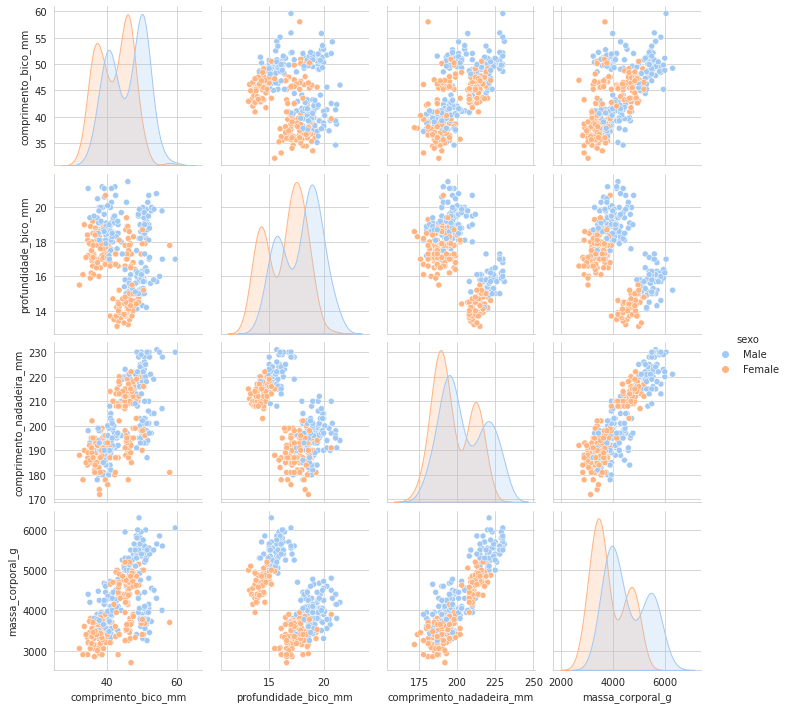

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="sexo", palette="pastel")

**Comentário:**  As fêmeas apresentam maior massa corporal em relação aos machos.

 - Atributos por espécie:

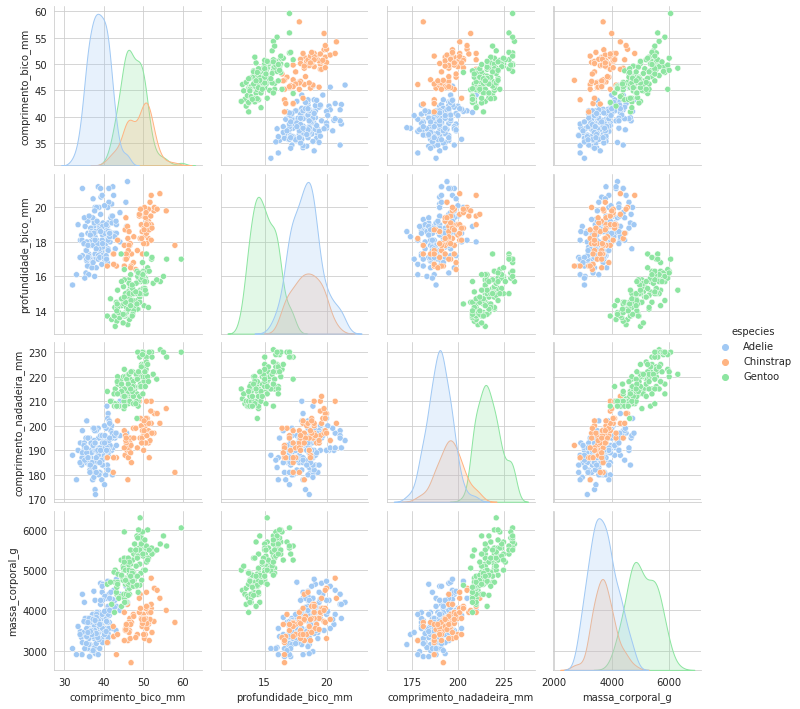

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="especies", palette="pastel")

**Comentário:** A espécie Adelie tem maior massa corporal em relação as demais especies. Na especie Gentoo, quanto maior o comprimento do bico maior a massa corporal 

 - Atributos por ilha:

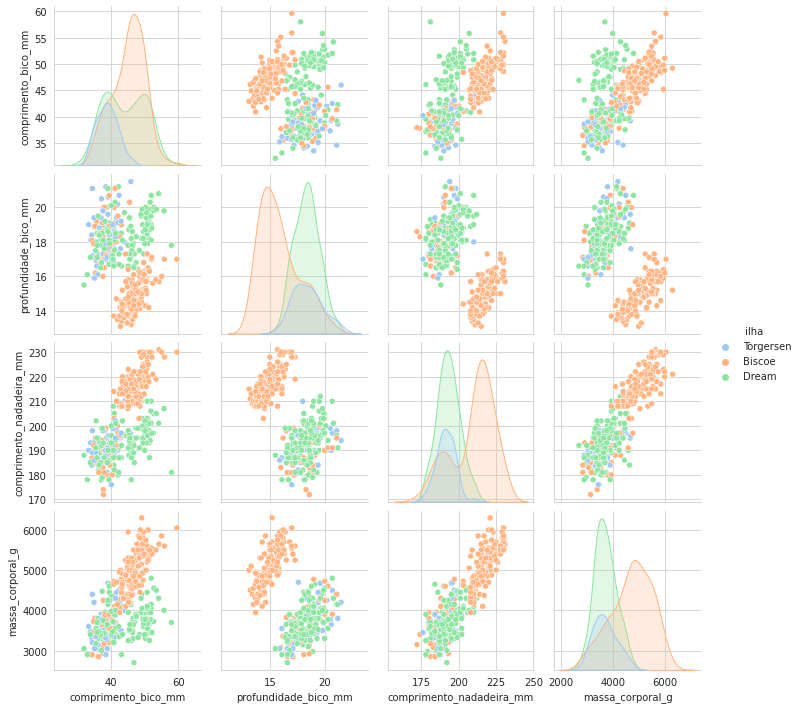

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="ilha", palette="pastel")

**Comentário:** Os penguins da ilha Dream apresentam maior massa corporal em relação as demais ilhas. 

## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [ ]:
# resposta da questão 2.1

In [ ]:
penguim.isnull().sum()

especies                     0
ilha                         0
comprimento_bico_mm          2
profundidade_bico_mm         2
comprimento_nadadeira_mm     2
massa_corporal_g             2
sexo                        11
dtype: int64

In [ ]:
penguim.dropna(inplace= True)

In [ ]:
penguim.isnull().sum()

especies                    0
ilha                        0
comprimento_bico_mm         0
profundidade_bico_mm        0
comprimento_nadadeira_mm    0
massa_corporal_g            0
sexo                        0
dtype: int64

### **2.2. Variáveis numéricas** 

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [ ]:
# resposta da questão 2.2

In [ ]:
penguim.describe().T

,count,mean,std,min,25%,50%,75%,max
comprimento_bico_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
profundidade_bico_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
comprimento_nadadeira_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
massa_corporal_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


In [ ]:
media_cb = penguim['comprimento_bico_mm'].mean()
print(media_cb)

desvio_padrao_cb = penguim['comprimento_bico_mm'].std()
print(desvio_padrao_cb)

43.99279279279279
5.468668342647559


In [ ]:
penguim['comprimento_bico_mm_std'] = penguim['comprimento_bico_mm'].apply(lambda comprimento: (comprimento - media_cb) / desvio_padrao_cb)

In [ ]:
media_pb = penguim['profundidade_bico_mm'].mean()
print(media_pb)

desvio_padrao_pb = penguim['profundidade_bico_mm'].std()
print(desvio_padrao_pb)

17.164864864864864
1.9692354633199007


In [ ]:
penguim['profundidade_bico_mm_std'] = penguim['profundidade_bico_mm'].apply(lambda profundidade: (profundidade - media_pb) / desvio_padrao_pb)

In [ ]:
media_cn = penguim['comprimento_nadadeira_mm'].mean()
print(media_cn)

desvio_padrao_cn = penguim['comprimento_nadadeira_mm'].std()
print(desvio_padrao_cn)

200.96696696696696
14.015765288287879


In [ ]:
penguim['comprimento_nadadeira_mm_std'] = penguim['comprimento_nadadeira_mm'].apply(lambda comprimento: (comprimento - media_cn) / desvio_padrao_cb)

In [ ]:
penguim.head()

,especies,ilha,comprimento_bico_mm,profundidade_bico_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo,comprimento_bico_mm_std,profundidade_bico_mm_std,comprimento_nadadeira_mm_std
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.894695,0.779559,-3.651157
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.821552,0.119404,-2.736858
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.675264,0.424091,-1.091119
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.333559,1.084246,-1.456839
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.858123,1.744400,-2.005418


### **2.3. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [ ]:
# resposta da questão 2.3

In [ ]:
penguim['sex_m_nom'] = penguim['sexo'].apply(lambda sexo: 1 if sexo == 'Male' else 0)
penguim['sex_f_nom'] = penguim['sexo'].apply(lambda sexo: 1 if sexo == 'Female' else 0)

In [ ]:
ilha_mapper = {
   'Torgersen':1, 
   'Biscoe':2, 
   'Dream': 3,
}

In [ ]:
penguim['ilha_encoded_ord'] = penguim['ilha'].apply(lambda level: ilha_mapper[level])

In [ ]:
penguim['especies'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
especie_mapper = {
   'Adelie':1, 
   'Chinstrap':2, 
   'Gentoo': 3,
}

In [ ]:
penguim['especie_encoded_ord'] = penguim['especies'].apply(lambda level: especie_mapper[level])

In [ ]:
penguim.sample(10)

,especies,ilha,comprimento_bico_mm,profundidade_bico_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo,comprimento_bico_mm_std,profundidade_bico_mm_std,comprimento_nadadeira_mm_std,sex_m_nom,sex_f_nom,ilha_encoded_ord,especie_encoded_ord
134,Adelie,Dream,38.1,17.6,187.0,3425.0,Female,-1.077555,0.220967,-2.553998,0,1,3,1
249,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,Male,1.098477,-0.946999,3.480378,1,0,2,3
177,Chinstrap,Dream,52.0,19.0,197.0,4150.0,Male,1.464197,0.931902,-0.725399,1,0,3,2
258,Gentoo,Biscoe,44.0,13.6,208.0,4350.0,Female,0.001318,-1.810279,1.286060,0,1,2,3
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,0.586470,-1.759497,2.383219,0,1,2,3
130,Adelie,Torgersen,38.5,17.9,190.0,3325.0,Female,-1.004411,0.373310,-2.005418,0,1,1,1
164,Chinstrap,Dream,47.0,17.3,185.0,3700.0,Female,0.549898,0.068623,-2.919718,0,1,3,2
119,Adelie,Torgersen,41.1,18.6,189.0,3325.0,Male,-0.528976,0.728778,-2.188278,1,0,1,1
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,Female,0.860759,-1.556373,1.651779,0,1,2,3
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female,-0.528976,0.220967,-3.468297,0,1,1,1


### **2.4. Limpeza** 

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [ ]:
# resposta da questão 2.4

In [ ]:
penguim.columns

Index(['especies', 'ilha', 'comprimento_bico_mm', 'profundidade_bico_mm',
       'comprimento_nadadeira_mm', 'massa_corporal_g', 'sexo',
       'comprimento_bico_mm_std', 'profundidade_bico_mm_std',
       'comprimento_nadadeira_mm_std', 'sex_m_nom', 'sex_f_nom',
       'ilha_encoded_ord', 'especie_encoded_ord'],
      dtype='object')

In [ ]:
penguim.drop(columns=['especies','ilha', 'comprimento_bico_mm', 'profundidade_bico_mm',
       'comprimento_nadadeira_mm', 'sexo'],inplace = True)

In [ ]:
penguim.sample(10)

,massa_corporal_g,comprimento_bico_mm_std,profundidade_bico_mm_std,comprimento_nadadeira_mm_std,sex_m_nom,sex_f_nom,ilha_encoded_ord,especie_encoded_ord
140,3400.0,-0.693550,-0.032939,-1.456839,0,1,3,1
111,4600.0,0.293894,1.592057,-1.822558,1,0,2,1
4,3450.0,-1.333559,1.084246,-1.456839,0,1,1,1
109,4775.0,-0.144970,0.931902,-0.725399,1,0,2,1
145,3650.0,-0.912981,0.779559,-2.919718,1,0,3,1
232,4650.0,0.275608,-1.759497,2.383219,0,1,2,3
116,2900.0,-0.986125,-0.083720,-2.371138,0,1,1,1
17,4500.0,-0.272972,1.795182,-0.725399,1,0,1,1
50,3500.0,-0.803266,0.271748,-2.736858,0,1,2,1
294,4700.0,0.440182,-1.099343,2.748939,0,1,2,3


In [ ]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   massa_corporal_g              333 non-null    float64
 1   comprimento_bico_mm_std       333 non-null    float64
 2   profundidade_bico_mm_std      333 non-null    float64
 3   comprimento_nadadeira_mm_std  333 non-null    float64
 4   sex_m_nom                     333 non-null    int64  
 5   sex_f_nom                     333 non-null    int64  
 6   ilha_encoded_ord              333 non-null    int64  
 7   especie_encoded_ord           333 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 23.4 KB


### **2.5. Treino/Teste** 

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

In [ ]:
# resposta da questão 2.5

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    penguim.drop(['massa_corporal_g'], axis=1), 
    penguim['massa_corporal_g'], 
    test_size=0.33, 
    random_state=123
)

In [ ]:
predictors_train.head()

,comprimento_bico_mm_std,profundidade_bico_mm_std,comprimento_nadadeira_mm_std,sex_m_nom,sex_f_nom,ilha_encoded_ord,especie_encoded_ord
84,-1.223843,0.322529,-1.822558,0,1,3,1
267,1.189907,-0.642313,4.394677,1,0,2,3
131,-0.163256,1.033465,-0.725399,1,0,1,1
67,-0.528976,0.982683,-2.371138,1,0,2,1
223,1.098477,-0.997781,3.114658,1,0,2,3


In [ ]:
predictors_train.shape

(223, 7)

In [ ]:
predictors_test.head()

,comprimento_bico_mm_std,profundidade_bico_mm_std,comprimento_nadadeira_mm_std,sex_m_nom,sex_f_nom,ilha_encoded_ord,especie_encoded_ord
111,0.293894,1.592057,-1.822558,1,0,2,1
158,0.385324,0.525653,-4.199737,0,1,3,2
288,-0.090112,-1.505592,3.480378,0,1,2,3
308,0.641327,-1.607154,2.017499,0,1,2,3
185,1.281337,0.830340,0.371760,1,0,3,2


In [ ]:
predictors_test.shape

(110, 7)

 - **Variável resposta (target)**

In [ ]:
target_train.head()

84     3350.0
267    5400.0
131    3500.0
67     4100.0
223    5700.0
Name: massa_corporal_g, dtype: float64

In [ ]:
target_train.shape

(223,)

In [ ]:
target_test.head()

111    4600.0
158    3250.0
288    4700.0
308    4875.0
185    4100.0
Name: massa_corporal_g, dtype: float64

In [ ]:
target_test.shape

(110,)

## 3\. Modelagem 

### **3.1. Treino** 

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [ ]:
# resposta da questão 3.1

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model = model.fit(predictors_train, target_train)

In [ ]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['comprimento_bico_mm_std', 'profundidade_bico_mm_std',
        'comprimento_nadadeira_mm_std', 'sex_m_nom', 'sex_f_nom',
        'ilha_encoded_ord', 'especie_encoded_ord'], dtype=object),
 'n_features_in_': 7,
 'coef_': array([ -55.37037508,  -38.17420227,  156.21794307,  277.36792104,
        -277.36792104,  -75.57182092,  306.97565064]),
 '_residues': array([], dtype=float64),
 'rank_': 6,
 'singular_': array([4.31775414e+01, 1.50942956e+01, 1.19180000e+01, 7.78568392e+00,
        6.38724391e+00, 3.29926816e+00, 1.98732511e-15]),
 'intercept_': 3777.740518845402}

In [ ]:
a = model.coef_
print(a)

[ -55.37037508  -38.17420227  156.21794307  277.36792104 -277.36792104
  -75.57182092  306.97565064]


In [ ]:
b = model.intercept_
print(b)

3777.740518845402


### **3.2. Avaliação** 

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui um RMSE de approx. 296g, 7% da média do peso, uma performance razoável (seu RMSE pode não ser igual).

In [ ]:
# resposta da questão 3.2

In [ ]:
target_predicted = model.predict(predictors_test)

In [ ]:
target_predicted[0:5]

array([3849.17562608, 3190.13230217, 4876.31770602, 4611.16673896,
       4397.77420461])

In [ ]:
target_predicted.shape

(110,)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

330.5967987493107


## 4\. Predição  

### **4.1. Novo penguim** 

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2 e 2.3

> **Nota:** Como referência eu obtive um peso predito de 3786.16g (a sua predição pode não ser igual).

In [ ]:
# resposta da questão 4.1

In [ ]:
#gerando dados do novo penguim
novo_penguim = {'especies': 'Adelie',
                'ilha': 'Biscoe',
                'comprimento_bico_mm':38.2, 
                'profundidade_bico_mm':18.1,
       'comprimento_nadadeira_mm':185.0, 
       'sexo':'Male'}

In [ ]:
novo_penguim = (pd.DataFrame([novo_penguim]))


In [ ]:
novo_penguim

,especies,ilha,comprimento_bico_mm,profundidade_bico_mm,comprimento_nadadeira_mm,sexo
0,Adelie,Biscoe,38.2,18.1,185.0,Male


Pré processando os atributos

In [ ]:
novo_penguim['comprimento_bico_mm_std'] = novo_penguim['comprimento_bico_mm'].apply(lambda comprimento: (comprimento - media_cb) / desvio_padrao_cb)

In [ ]:
novo_penguim['profundidade_bico_mm_std'] = novo_penguim['profundidade_bico_mm'].apply(lambda profundidade: (profundidade - media_pb) / desvio_padrao_pb)

In [ ]:
novo_penguim['comprimento_nadadeira_mm_std'] = novo_penguim['comprimento_nadadeira_mm'].apply(lambda comprimento: (comprimento - media_cn) / desvio_padrao_cb)

In [ ]:
novo_penguim['sex_m_nom'] = novo_penguim['sexo'].apply(lambda sexo: 1 if sexo == 'Male' else 0)
novo_penguim['sex_f_nom'] = novo_penguim['sexo'].apply(lambda sexo: 1 if sexo == 'Female' else 0)

In [ ]:
novo_penguim['ilha_encoded_ord'] = novo_penguim['ilha'].apply(lambda level: ilha_mapper[level])

In [ ]:
novo_penguim['especie_encoded_ord'] = novo_penguim['especies'].apply(lambda level: especie_mapper[level])

In [ ]:
novo_penguim

,especies,ilha,comprimento_bico_mm,profundidade_bico_mm,comprimento_nadadeira_mm,sexo,comprimento_bico_mm_std,profundidade_bico_mm_std,comprimento_nadadeira_mm_std,sex_m_nom,sex_f_nom,ilha_encoded_ord,especie_encoded_ord
0,Adelie,Biscoe,38.2,18.1,185.0,Male,-1.059269,0.474872,-2.919718,1,0,2,1


In [ ]:
novo_penguim.drop(columns=['especies','ilha','comprimento_bico_mm',	'profundidade_bico_mm',	'comprimento_nadadeira_mm', 'sexo'],inplace = True)

In [ ]:
novo_penguim

,comprimento_bico_mm_std,profundidade_bico_mm_std,comprimento_nadadeira_mm_std,sex_m_nom,sex_f_nom,ilha_encoded_ord,especie_encoded_ord
0,-1.059269,0.474872,-2.919718,1,0,2,1


In [ ]:
penguim.head(1)

,massa_corporal_g,comprimento_bico_mm_std,profundidade_bico_mm_std,comprimento_nadadeira_mm_std,sex_m_nom,sex_f_nom,ilha_encoded_ord,especie_encoded_ord
0,3750.0,-0.894695,0.779559,-3.651157,1,0,1,1


In [ ]:
novo_penguim = np.array(novo_penguim)

In [ ]:
novo_penguim

array([[-1.05926936,  0.47487218, -2.91971756,  1.        ,  0.        ,
         2.        ,  1.        ]])

In [ ]:
peso = model.predict(novo_penguim.reshape(1, -1))
print('O peso previsto para o novo penguim, baseado em suas características físicas e geográficas, é',float(peso))

O peso previsto para o novo penguim, baseado em suas características físicas e geográficas, é 3795.352452691668


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


---